In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [53]:
def INFO(what):
    print(f">>>>>>> {what} >>>>>>>")

In [45]:
INFO("Đặt đường dẫn dataset")
data_path = r"./bank+marketing/bank-additional/bank-additional/bank-additional-full.csv"

INFO("Phân tách csv, ký tự phân tách là `;`")
df = pd.read_csv(data_path, sep=';')

INFO("Kiểm tra kiểu dữ liệu của mỗi cột")
print(df.dtypes)

INFO("Thống kê số lượng thuộc tính theo kiểu dữ liệu")
print("\nSố lượng đặc trưng theo kiểu dữ liệu:")
print(df.dtypes.value_counts())

INFO("Kiểm tra một số dòng đầu tiên để xem dữ liệu thực tế")
INFO("Mẫu dữ liệu:")
print(df.describe())


>>>>>>> Đặt đường dẫn dataset >>>>>>>

>>>>>>> Phân tách csv, ký tự phân tách là `;` >>>>>>>

>>>>>>> Kiểm tra kiểu dữ liệu của mỗi cột >>>>>>>
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

>>>>>>> Thống kê số lượng thuộc tính theo kiểu dữ liệu >>>>>>>

Số lượng đặc trưng theo kiểu dữ liệu:
object     11
int64       5
float64     5
Name: count, dtype: int64

>>>>>>> Kiểm tra một số dòng đầu tiên để xem dữ liệu thực tế >>>>>>>

>>>>>>> Mẫu dữ liệu: >>>>>>>
               age      

In [46]:
INFO("Thống kê các cột categorical")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n#### {col} ####:")
    print(df[col].value_counts())


>>>>>>> Thống kê các cột categorical >>>>>>>

#### job ####:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

#### marital ####:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

#### education ####:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

#### default ####:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

#### housing ####:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

#### 

In [47]:
INFO("Kiểm tra biến Y xem có cân bằng không")
yes_count = (df['y'] == "yes").sum()
no_count = (df['y'] == "no").sum()
print(f'#yes = {yes_count}; %ratio = {100*(yes_count/(no_count+yes_count))}%')
print(f'#no = {no_count}; %ratio = {100*(no_count/(no_count+yes_count))}%')
INFO("Từ kết quả, cho thấy dữ liệu không cân bằng!")


>>>>>>> Kiểm tra biến Y xem có cân bằng không >>>>>>>
#yes = 4640; %ratio = 11.265417111780131%
#no = 36548; %ratio = 88.73458288821988%

>>>>>>> Từ kết quả, cho thấy dữ liệu không cân bằng! >>>>>>>


In [48]:
# INFO("Mã hóa dữ liệu ")
# label_encoders = {}
# categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'y']
# for col in categorical_cols:
#     print(f"Processing `{col}` \t\tcolumn \t\t/ `{df[col].dtype}`...")
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le
# # Encode y separately
# df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Or use LabelEncoder if preferred
# df.describe()

In [49]:
INFO("Chia IN/OUT")
X, Y = df.drop(columns=['y']), df['y']
INFO("X:")
print(X.describe())
INFO("Y:")
print(Y.describe())


>>>>>>> Chia IN/OUT >>>>>>>

>>>>>>> X: >>>>>>>
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std  

In [50]:
INFO("Chia tập dữ liệu với stratify để đảm bảo tỷ lệ lớp ")
test_size=0.1 
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=test_size, 
    random_state=42, 
    stratify=Y
)
INFO("X_train:")
print(X_train.head())
INFO("Y_train:")
print(Y_train.head())


>>>>>>> Chia tập dữ liệu với stratify để đảm bảo tỷ lệ lớp  >>>>>>>

>>>>>>> X_train: >>>>>>>
       age          job   marital            education  default housing loan  \
8061    52   technician  divorced  professional.course  unknown     yes   no   
25300   36   management   married    university.degree       no     yes   no   
17667   53  blue-collar   married          high.school       no     yes  yes   
37400   45  blue-collar    single             basic.9y       no     yes   no   
4629    60    housemaid   married          high.school  unknown     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
8061   telephone   jun         mon        56         8    999         0   
25300   cellular   nov         tue       267         2    999         0   
17667   cellular   jul         mon       243         2    999         0   
37400   cellular   aug         wed       249         1      4         1   
4629   telephone   may         wed        74     

In [51]:
INFO("Training class distribution:")
print(Y_train.value_counts(normalize=True) * 100)
INFO("Test class distribution:")
print(Y_test.value_counts(normalize=True) * 100)


>>>>>>> Training class distribution: >>>>>>>
y
no     88.734522
yes    11.265478
Name: proportion, dtype: float64

>>>>>>> Test class distribution: >>>>>>>
y
no     88.73513
yes    11.26487
Name: proportion, dtype: float64


In [52]:
INFO("Tách dữ liệu số (numberical) và dữ liệu dạng phân loại (categorical)")
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
INFO("Tách target và features của lớp dữ liệu categorical")
categorical_features.remove('y')  


>>>>>>> Tách dữ liệu số (numberical) và dữ liệu dạng phân loại (categorical) >>>>>>>

>>>>>>> Tách target và features của lớp dữ liệu categorical >>>>>>>


In [57]:
INFO("Xây dựng pipeline với OneHotEncoder và SMOTE")
INFO("Xác định bộ tiền xử lý với OneHotenCoder cho các tính năng phân loại")
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_features),
    ('cat', ohe, categorical_features)
])
INFO("Tạo pipeline với tiền xử lý, smote và phân loại")
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

>>>>>>> Xây dựng pipeline với OneHotEncoder và SMOTE >>>>>>>
>>>>>>> Xác định bộ tiền xử lý với OneHotenCoder cho các tính năng phân loại >>>>>>>
>>>>>>> Tạo pipeline với tiền xử lý, smote và phân loại >>>>>>>


In [58]:
INFO("Huấn luyện mô hình")
INFO("Fit pipeline")
pipeline.fit(X_train, Y_train)

>>>>>>> Huấn luyện mô hình >>>>>>>
>>>>>>> Fit pipeline >>>>>>>


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [60]:
INFO("Đánh giá mô hình")
Y_pred = pipeline.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

>>>>>>> Đánh giá mô hình >>>>>>>
              precision    recall  f1-score   support

          no       0.98      0.86      0.92      3655
         yes       0.45      0.90      0.60       464

    accuracy                           0.87      4119
   macro avg       0.72      0.88      0.76      4119
weighted avg       0.93      0.87      0.88      4119

Accuracy: 0.8662296673949987


>>>>>>> Các đặc trưng quan trọng >>>>>>>


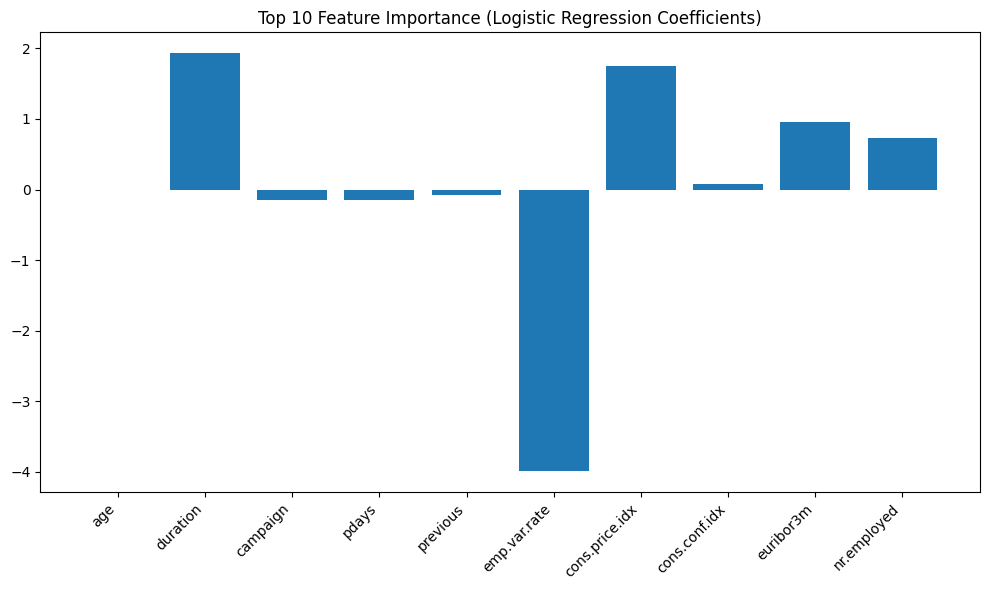

In [63]:
INFO("Các đặc trưng quan trọng")
ohe_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, ohe_features])
coefficients = pipeline.named_steps['classifier'].coef_[0]
plt.figure(figsize=(10, 6))
plt.bar(feature_names[:10], coefficients[:10])  # Show top 10 for readability
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()